In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import io
from base64 import b64encode

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go

<ipython-input-1-8661e01b2a9e>:9: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-8661e01b2a9e>:10: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
exp_w_nt_5 = [360.00,360.00,360.00,360.00,360.00]
exp_h_nt_5 = [190.00, 190.00, 190.00, 190.00, 190.00]
exp_l_nt_5 = [420, 420, 420, 420, 420]

exp_w_t_5 = [300.00, 300.00, 300.00, 300.00, 300.00]
exp_h_t_5 = [190.00, 190.00, 190.00, 190.00, 190.00]
exp_l_t_5 = [420, 420, 420, 420, 420]

exp_w_nt_4 = [360.00,360.00,360.00,360.00]
exp_h_nt_4 = [190.00, 190.00, 190.00, 190.00]
exp_l_nt_4 = [420, 420, 420, 420]

exp_w_t_1 = [300.00]
exp_h_t_1 = [190.00]
exp_l_t_1 = [420]

cl_w_nt = [142.00, 174.03, 190.00, 134.09]
cl_h_nt = [155.03, 156.20, 167.01, 188.01]
cl_l_nt = [427.09, 425.92, 415.11, 394.11]

cl_w_t = [280.22]
cl_h_t = [187.42]
cl_l_t = [353.63]

b_w_nt = [128.00, 112.04, 136.06, 158.00, 140.09]
b_h_nt = [164.30, 185.39, 185.17, 150.00, 185.61]
b_l_nt = [418.23, 397.15, 397.36, 432.53, 396.93]

b_w_t = [207.09, 245.17, 204.22, 197.21, 210.29]
b_h_t = [175.73, 206.20, 153.58, 174.23, 185.17]
b_l_t = [406.81, 376.34, 428.95, 408.30, 397.36]



In [ ]:
meas = io.StringIO()

fig = go.Figure()

# Add traces



fig.add_trace(go.Scatter3d(x = cl_w_nt, y = cl_h_nt, z = cl_l_nt,
                    marker_color= 'indianred',
                    mode='markers',
                    name='Side No Teeth'))

fig.add_trace(go.Scatter3d(x = b_w_nt, y = b_h_nt, z = b_l_nt,
                    marker_color= 'red',
                    mode='markers',
                    name='Bottom-To-Top Teeth'))

fig.add_trace(go.Scatter3d(x=exp_w_nt_4, y=exp_h_nt_4, z=exp_l_nt_4,
                    error_x=dict(
                    value=25), 
                    error_y=dict(
                    value=25),
                    error_z=dict(
                    symmetric=True,
                    value=25),
                    marker_color= 'darkred',
                    mode='markers',
                    name='Expected No Teeth'))

fig.add_trace(go.Scatter3d(x=cl_w_t, y=cl_h_t, z=cl_l_t,
                    marker_color= 'dodgerblue',
                    mode='markers',
                    name='Side Teeth'))

fig.add_trace(go.Scatter3d(x = b_w_t, y = b_h_t, z = b_l_t,
                    marker_color= 'blue',
                    mode='markers',
                    name='Bottom-To-Top Teeth'))

fig.add_trace(go.Scatter3d(x=exp_w_t_1, y=exp_h_t_1, z=exp_l_t_1,
                    error_x=dict(
                    value=25), 
                    error_y=dict(
                    value=25),
                    error_z=dict(
                    symmetric=True,
                    value=25),
                    marker_color= 'darkblue',
                    mode='markers',
                    name='Expected Teeth'))

fig.update_layout(  title = {
                    'text': "Slot Measurments",
                    'y':1,
                    'x':0,
                    'xanchor': 'left',
                    'yanchor': 'top'}, 
                    title_font =dict(size=30),
                    title_pad=dict(l=0, r=0, t=0, b=0),
                    width =1000,
                    height =1000,
                    scene = dict(
                    xaxis_title='Slot W (μm)',
                    yaxis_title='Slot H (μm)',
                    zaxis_title='Platform H (μm)',
                    aspectratio = dict( x=0, y=0, z=0 ),
                    aspectmode = 'manual'),
                    margin=dict(l=0, r=0, t=0, b=0, pad = 0)
                    )


fig.show()

fig.write_html("Measurments")

html_bytes = meas.getvalue().encode()
encoded = b64encode(html_bytes).decode()

app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Graph(id="graph", figure=fig),
    html.A(
        html.Button("Download HTML"), 
        id="download",
        href="data:text/html;base64," + encoded,
        download="Measurements.html"
    )
])

app.run_server(debug=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Oct/2021 13:50:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2021 13:50:41] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2021 13:50:41] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2021 13:50:41] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2021 13:50:41] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2021 13:51:20] "HEAD / HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2021 13:51:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2021 13:51:20] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2021 13:51:20] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2021 13:51:20] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2021 13:51:20] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2021 14

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xerror = [25,25,25,25]
yerror = [25,25,25,25]
zerror = [25,25,25,25]

nt = ax.scatter(cl_h_nt, cl_w_nt, cl_l_nt, depthshade=False, color = "darkblue", label="No Teeth")
exp_nt = ax.scatter(exp_h_nt_4, exp_w_nt_4, exp_l_nt_4, color = "blue", label = "Expected No Teeth")
t = ax.scatter(cl_h_t, cl_w_t, cl_l_t, color = "darkred", label="Teeth")
exp_t = ax.scatter(exp_h_t_1, exp_w_t_1, exp_l_t_1, color = "red", label = "Expected Teeth")
#ax.errorbar3D(exp_h_nt_4, exp_w_nt_4, exp_l_nt_4, xerr = 25, yerr = 25, zerr = 25, marker = '+',lw =1, color = "blue")
#ax.errorbar(exp_w_t_1, exp_h_t_1, exp_l_t_1, xerr = 25, yerr = 25, zerr = 25, marker = '+',lw =1, color = "red")

for i in np.arange(0, len(exp_h_nt_4)):
        ax.plot([exp_h_nt_4[i]+xerror[i], exp_h_nt_4[i]-xerror[i]], [exp_w_nt_4[i], exp_w_nt_4[i]], [exp_l_nt_4[i], exp_l_nt_4[i]],color = "blue", marker="",lw=.5)
        ax.plot([exp_h_nt_4[i], exp_h_nt_4[i]], [exp_w_nt_4[i]+yerror[i], exp_w_nt_4[i]-yerror[i]], [exp_l_nt_4[i], exp_l_nt_4[i]],color = "blue", marker="",lw=.5)
        ax.plot([exp_h_nt_4[i], exp_h_nt_4[i]], [exp_w_nt_4[i], exp_w_nt_4[i]], [exp_l_nt_4[i]+zerror[i], exp_l_nt_4[i]-zerror[i]],color = "blue", marker="",lw=.5)

for i in np.arange(0, len(exp_h_t_1)):
        ax.plot([exp_h_t_1[i]+xerror[1], exp_h_t_1[i]-xerror[1]], [exp_w_t_1[i], exp_w_t_1[i]], [exp_l_t_1[i], exp_l_t_1[i]],color="red", marker="",lw=.5)
        ax.plot([exp_h_t_1[i], exp_h_t_1[i]], [exp_w_t_1[i]+yerror[1], exp_w_t_1[i]-yerror[1]], [exp_l_t_1[i], exp_l_t_1[i]],color="red", marker="",lw=.5)
        ax.plot([exp_h_t_1[i], exp_h_t_1[i]], [exp_w_t_1[i], exp_w_t_1[i]], [exp_l_t_1[i]+zerror[1], exp_l_t_1[i]-zerror[1]],color="red", marker="",lw=.5)



#ax.set_xlim([100, 225])
#ax.set_ylim([120, 360])
#ax.set_zlim([350, 450])

#ax.autoscale(True)

ax.set_xlabel('Inner Height ($\mu$m)')
ax.set_ylabel('Inner Width ($\mu$m)')
ax.set_zlabel('Platform To Slot ($\mu$m)')
ax.set_title("Clear Stages - Side Print")
#ax.legend(['No Teeth', 'Epected No Teeth','Teeth', 'Expected Teeth'])
plt.show()

<Figure size 432x288 with 0 Axes>

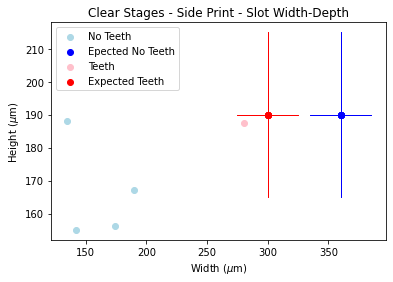

In [29]:
fig = plt.figure()
fig, ax = plt.subplots()

ax.scatter(cl_w_nt, cl_h_nt, color = "lightblue", label="No Teeth")
ax.scatter(exp_w_nt_5, exp_h_nt_5, color = "blue", label = "Expected No Teeth")
ax.scatter(cl_w_t, cl_h_t, color = "pink", label="Teeth")
ax.scatter(exp_w_t_5, exp_h_t_5, color = "red", label = "Expected Teeth")
ax.errorbar(exp_w_nt_5, exp_h_nt_5,yerr = 25,xerr = 25,marker = '+',lw =1, color = "blue")
ax.errorbar(exp_w_t_5, exp_h_t_5,yerr = 25,xerr = 25,marker = '+',lw =1, color = "red")

#ax.set_xlim([120, 400])
#ax.set_ylim([120, 250])

plt.xlabel('Width ($\mu$m)')
plt.ylabel('Height ($\mu$m)')
plt.title("Clear Stages - Side Print - Slot Width-Depth")
plt.legend(['No Teeth', 'Epected No Teeth','Teeth', 'Expected Teeth'],loc='upper left')
#plt.show()
plt.savefig("Clear Stages_Side Print_Slot Width-Depth")

<Figure size 432x288 with 0 Axes>

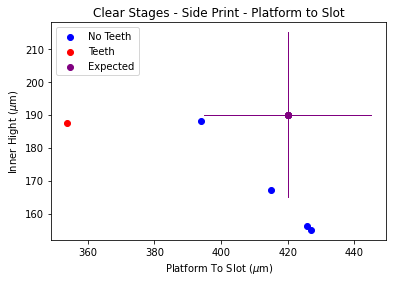

In [30]:
fig = plt.figure()
fig, ax = plt.subplots()

ax.scatter(cl_l_nt, cl_h_nt, color = "blue", label="No Teeth")
ax.scatter(cl_l_t, cl_h_t, color = "red", label="Teeth")
ax.scatter(exp_l_nt_5, exp_h_nt_5, color = "purple", label = "Expected")

ax.errorbar(exp_l_nt_5, exp_h_nt_5,yerr = 25,xerr = 25,marker = '+',lw =1, color = "purple")


#ax.set_xlim([120, 400])
#ax.set_ylim([120, 250])

ax.set_xlabel('Platform To Slot ($\mu$m)')
ax.set_ylabel('Inner Hight ($\mu$m)')
plt.title("Clear Stages - Side Print - Platform to Slot")
plt.legend(['No Teeth', 'Teeth', 'Expected'],loc='upper left')
#plt.show()
plt.savefig("Clear Stages_Side Print_Platform to Slot")

<Figure size 432x288 with 0 Axes>

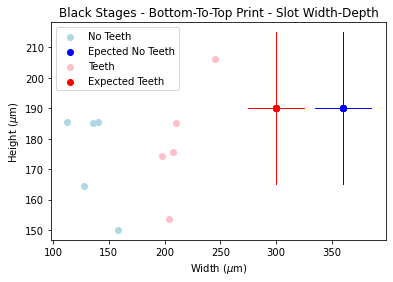

In [31]:
fig = plt.figure()
fig, ax = plt.subplots()

ax.scatter(b_w_nt, b_h_nt, color = "lightblue", label="No Teeth")
ax.scatter(exp_w_nt_5, exp_h_nt_5, color = "blue", label = "Expected No Teeth")
ax.scatter(b_w_t, b_h_t, color = "pink", label="Teeth")
ax.scatter(exp_w_t_5, exp_h_t_5, color = "red", label = "Expected Teeth")
ax.errorbar(exp_w_nt_5, exp_h_nt_5,yerr = 25,xerr = 25,marker = '+',lw =1, color = "blue")
ax.errorbar(exp_w_t_5, exp_h_t_5,yerr = 25,xerr = 25,marker = '+',lw =1, color = "red")

##ax.set_xlim([120, 400])
#ax.set_ylim([120, 250])

plt.xlabel('Width ($\mu$m)')
plt.ylabel('Height ($\mu$m)')
plt.title("Black Stages - Bottom-To-Top Print - Slot Width-Depth")
plt.legend(['No Teeth', 'Epected No Teeth','Teeth', 'Expected Teeth'],loc='upper left')
#plt.show()
plt.savefig("Black Stages_Side Print_Slot Width-Depth")

<Figure size 432x288 with 0 Axes>

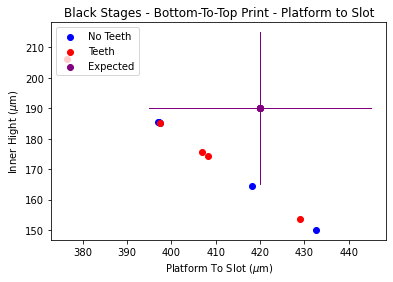

In [32]:
fig = plt.figure()
fig, ax = plt.subplots()

ax.scatter(b_l_nt, b_h_nt, color = "blue", label="No Teeth")
ax.scatter(b_l_t, b_h_t, color = "red", label="Teeth")
ax.scatter(exp_l_nt_5, exp_h_nt_5, color = "purple", label = "Expected")

ax.errorbar(exp_l_nt_5, exp_h_nt_5,yerr = 25,xerr = 25,marker = '+',lw =1, color = "purple")


#ax.set_xlim([120, 400])
#ax.set_ylim([120, 250])

ax.set_ylabel('Inner Hight ($\mu$m)')
ax.set_xlabel('Platform To Slot ($\mu$m)')
plt.title("Black Stages - Bottom-To-Top Print - Platform to Slot")
plt.legend(['No Teeth', 'Teeth', 'Expected'],loc='upper left')
#plt.show()
plt.savefig("Black Stages_Side Print_Platform to Slot")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import io
from base64 import b64encode

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go

<ipython-input-5-8661e01b2a9e>:9: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-5-8661e01b2a9e>:10: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [6]:
#NEW STAGES#


##No Teeth

#DESIGN#
w_nte= [350.00,350.00,350.00,350.00,350.00]
l_nte= [190.00, 190.00, 190.00, 190.00, 190.00]
h_nte= [420, 420, 420, 420, 420]

#MEASUREMENTS#
#Front
w_ntf = [322.44,355.12,331.07,354.00,338.50]
l_ntf = [189.29,197.68,193.20,198.29,191.65]
h_ntf = [406.89,404.60,434.59,400.51,420.72]



#Back
w_ntb = [342.34,337.87,327.70,330.67,322.70]
l_ntb = [206.90,192.40,200.44,191.26,196.86]
h_ntb = [402.50,405.88,425.48,412.10,411.35]


#Top
#Front
w_nttf=[322.13,352.88,320.66,332.03,352.06]
#Back
w_nttb=[336.10,316.54,292.61,317.51,311.78]


##Teeth

#DESIGN#
w_te = [300.00, 300.00, 300.00, 300.00, 300.00]
l_te = [190.00, 190.00, 190.00, 190.00, 190.00]
h_te = [420, 420, 420, 420, 420]

#MEASUREMENTS#
#Front
w_tf = [320.60,292.23,294.49,309.10,299.82]
l_tf = [184.39,191.41,206.89,193.75,194.17]
h_tf= [428.10,408.33,409.02,437.86,404.10]

#Back
w_tb = [312.00,296.55,289.08,301.66,302.73]
l_tb= [194.24,207.06,192.58,195.82,195.82]
h_tb= [404.04,422.73,420.41,432.63,411.55]

#Top
#Front
w_ttf=[324.57,371.98,293.47,290.63,335.87]
#Back
w_ttb=[285.67,407.49,316.66,346.80,334.40]

In [120]:
meas = io.StringIO()

fig = go.Figure()

# Add traces



fig.add_trace(go.Scatter3d(x = w_ntf, y = l_ntf, z = h_ntf,
                    marker_color= 'indianred',
                    mode='markers',
                    name='Front No Teeth'))

fig.add_trace(go.Scatter3d(x = w_ntb, y = l_ntb, z = h_ntb,
                    marker_color= 'red',
                    mode='markers',
                    name='Back No Teeth'))

fig.add_trace(go.Scatter3d(x = w_nte, y = l_nte, z = h_nte,
                    error_x=dict(type='constant',symmetric=True,
                    value=25), 
                    error_y=dict(type='constant',symmetric=True,
                    value=25),
                    error_z=dict(type='constant',symmetric=True,
                    value=25),
                    marker_color= 'darkred',
                    mode='markers',
                    name='Expected No Teeth'))

fig.add_trace(go.Scatter3d(x = w_tf, y = l_tf, z = h_tf,
                    marker_color= 'dodgerblue',
                    mode='markers',
                    name='Front Teeth'))

fig.add_trace(go.Scatter3d(x = w_tb, y = l_tb, z = h_tb,
                    marker_color= 'blue',
                    mode='markers',
                    name='Back Teeth'))

fig.add_trace(go.Scatter3d(x = w_te, y = l_te, z = h_te,
                   error_x=dict(type='constant',symmetric=True,
                    value=25), 
                    error_y=dict(type='constant',symmetric=True,
                    value=25),
                    error_z=dict(type='constant',symmetric=True,
                    value=25),
                    marker_color= 'darkblue',
                    mode='markers',
                    name='Expected Teeth'))

fig.update_layout(  title = {
                    'text': "Slot Measurments",
                    'y':1,
                    'x':0,
                    'xanchor': 'left',
                    'yanchor': 'top'}, 
                    title_font =dict(size=30),
                    title_pad=dict(l=0, r=0, t=0, b=0),
                    #width =1000,
                    #height =1000,
                    scene = dict(
                    xaxis_title='Slot W (μm)',
                    yaxis_title='Slot L (μm)',
                    zaxis_title='Platform H (μm)',
                    aspectmode = 'manual',
                    aspectratio = dict( x=2, y=1, z=1 ))
                    #,margin=dict(l=0, r=0, t=0, b=0, pad = 0)
                    )


fig.show()

In [70]:
meas = io.StringIO()

fig = go.Figure()

# Add traces



fig.add_trace(go.Scatter3d(x = w_ntf, y = l_ntf, z = h_ntf,
                    marker_color= 'indianred',
                    mode='markers',
                    name='Front No Teeth'))

fig.add_trace(go.Scatter3d(x = w_ntb, y = l_ntb, z = h_ntb,
                    marker_color= 'red',
                    mode='markers',
                    name='Back No Teeth'))

fig.add_trace(go.Scatter3d(x = w_nte, y = l_nte, z = h_nte,
                    error_x=dict(type='constant',symmetric=True,
                    value=25), 
                    error_y=dict(type='constant',symmetric=True,
                    value=25),
                    error_z=dict(type='constant',symmetric=True,
                    value=25),
                    marker_color= 'darkred',
                    mode='markers',
                    name='Expected No Teeth'))

fig.update_layout(  title = {
                    'text': "Slot Measurments",
                    'y':1,
                    'x':0,
                    'xanchor': 'left',
                    'yanchor': 'top'}, 
                        title_font =dict(size=30),
                        title_pad=dict(l=0, r=0, t=0, b=0),
                    width =1000,
                    height =500,
                        scene = dict(
                        xaxis = dict(title = 'Slot W (μm)'),
                        yaxis = dict(title = 'Slot L (μm)' ),
                        zaxis = dict(title = 'Platform H (μm)'),
                    aspectmode = 'cube'),
                    margin=dict(l=0, r=0, t=0, b=0, pad = 0)
                    )


fig.show()

In [71]:
meas = io.StringIO()

fig = go.Figure()


fig.add_trace(go.Scatter3d(x = w_tf, y = l_tf, z = h_tf,
                    marker_color= 'dodgerblue',
                    mode='markers',
                    name='Front Teeth'))

fig.add_trace(go.Scatter3d(x = w_tb, y = l_tb, z = h_tb,
                    marker_color= 'blue',
                    mode='markers',
                    name='Back Teeth'))

fig.add_trace(go.Scatter3d(x = w_te, y = l_te, z = h_te,
                    error_x=dict(type='constant',symmetric=True,
                    value=25), 
                    error_y=dict(type='constant',symmetric=True,
                    value=25),
                    error_z=dict(type='constant',symmetric=True,
                    value=25),
                    marker_color= 'darkblue',
                    mode='markers',
                    name='Expected Teeth'))

fig.update_layout(  title = {
                    'text': "Slot Measurments",
                    'y':1,
                    'x':0,
                    'xanchor': 'left',
                    'yanchor': 'top'}, 
                        title_font =dict(size=30),
                        title_pad=dict(l=0, r=0, t=0, b=0),
                    width =1000,
                    height =500,
                        scene = dict(
                        xaxis = dict(title = 'Slot W (μm)'),
                        yaxis = dict(title = 'Slot L (μm)' ),
                        zaxis = dict(title = 'Platform H (μm)'),
                    aspectmode = 'cube'),
                    margin=dict(l=0, r=0, t=0, b=0, pad = 0)
                    )


fig.show()

In [10]:
##No Teeth##

#DESIGN#
w_nte= [350.00,350.00,350.00,350.00,350.00]

#MEASUREMENTS#
#Side
    #Front
w_ntf = [322.44,355.12,331.07,354.00,338.50]
    #Back
w_ntb = [342.34,337.87,327.70,330.67,322.70]


#Top
    #Front
w_nttf =[338.48,352.88,340.90,332.03,352.06]
    #Back
w_nttb = [347.05,348.56,326.16,329.73,337.16]


##Teeth##

#DESIGN#
w_te = [300.00, 300.00, 300.00, 300.00, 300.00]

#MEASUREMENTS#
#Side
    #Front
w_tf = [320.60,292.23,294.49,309.10,299.82]
    #Back
w_tb = [312.00,296.55,289.08,301.66,302.73]

#Top
    #Front
w_ttf = [324.57,317.07,293.47,290.63,298.41]
    #Back
w_ttb = [285.67,319.23,316.66,305.45,305.89]

In [14]:
meas = io.StringIO()

fig = go.Figure()

# Add traces



fig.add_trace(go.Scatter(x = w_ntf, y = w_nttf,
                    marker_color= 'indianred',
                    mode='markers',
                    name='Front No Teeth'))

fig.add_trace(go.Scatter(x = w_ntb, y = w_nttb,
                    marker_color= 'red',
                    mode='markers',
                    name='Back No Teeth'))


fig.add_trace(go.Scatter(x = w_nte, y = w_nte,
                    error_x=dict(type='constant',symmetric=True,
                    value=25), 
                    error_y=dict(type='constant',symmetric=True,
                    value=25),
                    marker_color= 'darkred',
                    mode='markers',
                    name='Expected No Teeth'))

fig.add_trace(go.Scatter(x = w_tf, y = w_ttf, 
                    marker_color= 'dodgerblue',
                    mode='markers',
                    name='Front Teeth'))

fig.add_trace(go.Scatter(x = w_tb, y = w_ttb, 
                    marker_color= 'blue',
                    mode='markers',
                    name='Back Teeth'))

fig.add_trace(go.Scatter(x = w_te, y = w_te,
                   error_x=dict(type='constant',symmetric=True,
                    value=25), 
                    error_y=dict(type='constant',symmetric=True,
                    value=25),
                    marker_color= 'darkblue',
                    mode='markers',
                    name='Expected Teeth'))

fig.update_layout(  title = {
                    'text': "Slot Widths"}, 
                    title_font =dict(size=30),
                    width =900,
                    height =800)
fig.update_xaxes(title_text='Side')
fig.update_yaxes(title_text='Top')


fig.show()